In [195]:
%matplotlib notebook
import os
import plotly.plotly as py
import plotly
import pandas as pd
import plotly.graph_objs as go
from imp import reload
import numpy as np
import cranium
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import scipy

#plotly.tools.set_credentials_file(username='msschwartz21', api_key='OrM0hMDBvseeT6SCjxNb')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [303]:
reload(cranium)

<module 'cranium' from 'c:\\users\\zfishlab\\code\\craniumpy\\cranium\\__init__.py'>

In [510]:
dirs = ["C:\\Users\\zfishlab\\Desktop\\zrf1wt13umyot21um\\wt\\AT2",
	"C:\\Users\\zfishlab\\Desktop\\zrf1wt13umyot21um\\wt\\ZRF1",
	"C:\\Users\\zfishlab\\Desktop\\zrf1wt13umyot21um\\yot\\AT",
	"C:\\Users\\zfishlab\\Desktop\\zrf1wt13umyot21um\\yot\\ZRF1"]

In [511]:
%%time
#Read all dfs into list
Ldfs = []
for d in dirs:
    df = read_csvs(d)
    Ldfs.append(df)

Wall time: 14 s


In [325]:
egdf = Ldfs[0][0]

In [326]:
egdf.head()

,Unnamed: 0,value,x,y,z,ac,r,theta,xc,yc,zc
0,2442400,0.95,406.0,197.0,11.0,-26.722200,79.783609,-2.905674,400.471008,131.455606,56.152929
1,2653845,0.93,400.0,197.0,12.0,-24.765782,78.871235,-2.945002,395.976095,130.609734,54.388824
2,2653851,0.91,406.0,197.0,12.0,-26.863539,79.221153,-2.914998,400.789205,131.516562,56.280449
3,2654441,0.93,407.0,198.0,12.0,-27.286191,80.113989,-2.916648,401.735714,131.698722,56.661830
4,2864713,0.92,406.0,196.0,13.0,-26.937773,77.835907,-2.917681,400.955990,131.548569,56.347428


In [327]:
np.min(egdf.r)

0.013428779605027506

In [517]:
len(Ldfs[1])

17

In [512]:
%%time
#Find theta and ac min and max for each df set
Lac,Lt = [],[]
for dfs in Ldfs:
    mi,ma = find_range(dfs,'theta')
    Lt.append(mi)
    Lt.append(ma)
    
    mi,ma = find_range(dfs,'ac')
    Lac.append(mi)
    Lac.append(ma)
    
    for df in dfs:
        df.theta = df['theta'].apply(lambda t: flip_theta(t))

print(np.min(Lac),np.max(Lac))
print(np.min(Lt),np.min(Lt))

#Define bins
acbin = np.linspace(np.min(Lac),np.max(Lac),num=50)
tbin = np.linspace(np.min(Lt),np.max(Lt),num=15)

-200.822886266 234.384587746
-3.14159138989 -3.14159138989
Wall time: 2.06 s


In [523]:
%%time
#Generate heatmaps
Lhms, Lavg = [],[]
for dfs in Ldfs:
    thm = create_avg_hm(dfs,'ac','theta',acbin,tbin)
    Lhms.append(thm)
    Lavg.append(np.mean(thm,axis=0))

C:\Users\zfishlab\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning:

invalid value encountered in greater_equal



Wall time: 1.79 s


In [468]:
thm.shape

(12, 49, 14)

In [506]:
%%time
#Find cmax
Lmax = []
for avg in Lavg:
    Lmax.append(np.max(avg))
print(Lmax)

[790.10204081632651, 393.9591836734694, 72.775510204081627, 171.48979591836735]
Wall time: 500 µs


In [531]:
wtat = create_hm_trace(acbin,tbin,Lavg[0].T,'Electric',5085)
wtzrf = create_hm_trace(acbin,tbin,Lavg[1].T,'Hot',440)
yat = create_hm_trace(acbin,tbin,Lavg[2].T,'Electric',5085)
yzrf = create_hm_trace(acbin,tbin,Lavg[3][0].T,'Hot',440)

In [530]:
Lavg[3][0].shape

(49, 14)

# Theta fix

In [346]:
def flip_theta(theta):
    if theta < 0:
        d = np.pi - abs(theta)
        return(-d)
    else:
        return(theta)

In [349]:
test = Ldfs[0][0]
test.theta = test['theta'].apply(lambda t: flip_theta(t))

# Create heatmaps

In [496]:
def create_hm_trace(x,y,z,cscale,cmax):
    data = go.Heatmap(
        z = z,
        x = x,
        y = y,
        colorscale = cscale,
        zmin = 0,
        zmax = cmax,
        hoverinfo = 'z'
    )
    return(data)

In [320]:
xaxis = dict(
    title = 'Position along the commissure'
)
yaxis = dict(
    title = 'Angle around the commissure (radians)'
)
layout = dict(
    xaxis = xaxis,
    yaxis = yaxis
)

In [533]:
#test = Lavg[3]
#test[:,6:] = test[:,7::-1]
#yzrf = create_hm_trace(acbin,tbin,test.T,'Hot',440)
#layout['xaxis']['range'] = [-160,160]
fig = go.Figure(data=[yzrf],layout=layout)
py.iplot(fig,filename='final_yotzrf1_hm_theta')

In [526]:
#layout['xaxis']['range'] = [-200,200]
fig = go.Figure(data=[wtzrf],layout=layout)
iplot(fig)#,filename='final_wtzrf1_hm_theta')

In [363]:
#layout['xaxis']['range'] = [-100,100]
fig = go.Figure(data=[yat],layout=layout)
py.iplot(fig,filename='final_ywt_hm_theta')

In [323]:
wtat = create_hm_trace(acbin,tbin,Lavg[0].T,'Electric',5085)

In [444]:
acbin

array([-200.82288627, -191.94110108, -183.0593159 , -174.17753071,
       -165.29574553, -156.41396035, -147.53217516, -138.65038998,
       -129.76860479, -120.88681961, -112.00503443, -103.12324924,
        -94.24146406,  -85.35967888,  -76.47789369,  -67.59610851,
        -58.71432332,  -49.83253814,  -40.95075296,  -32.06896777,
        -23.18718259,  -14.3053974 ,   -5.42361222,    3.45817296,
         12.33995815,   21.22174333,   30.10352852,   38.9853137 ,
         47.86709888,   56.74888407,   65.63066925,   74.51245444,
         83.39423962,   92.2760248 ,  101.15780999,  110.03959517,
        118.92138036,  127.80316554,  136.68495072,  145.56673591,
        154.44852109,  163.33030628,  172.21209146,  181.09387664,
        189.97566183,  198.85744701,  207.73923219,  216.62101738,
        225.50280256,  234.38458775])

In [445]:
tbin

array([-3.14159103, -2.81089745, -2.48020386, -2.14951028, -1.8188167 ,
       -1.48812312, -1.15742954, -0.82673596, -0.49604238, -0.16534879,
        0.16534479,  0.49603837,  0.82673195,  1.15742553,  1.48811911,
        1.8188127 ,  2.14950628,  2.48019986,  2.81089344,  3.14158702])

In [356]:
#layout['xaxis']['range'] = [-100,100]
fig = go.Figure(data=[wtat],layout=layout)
py.iplot(fig,filename='final_atwt_hm_theta')

In [56]:
def read_csvs(filedir):
    files = os.listdir(filedir)
    dfs = []
    for file in files:
        if 'Probabilities' in file and 'csv' in file:
            df = pd.read_csv(os.path.join(filedir,file))
            dfs.append(df)
    return(dfs)

In [57]:
def find_range(dfs,key):
    Lmin,Lmax = [],[]
    for df in dfs:
        Lmin.append(np.min(df[key]))
        Lmax.append(np.max(df[key]))
        
    minv = np.min(Lmin)
    maxv = np.max(Lmax)
    return(minv,maxv)

In [521]:
def create_avg_hm(dfs,xkey,ykey,xbins,ybins):
    
    Lhm = []
    for i,df in enumerate(dfs):
        hm = np.histogram2d(df[xkey],df[ykey],bins=[xbins,ybins])
        if i == 0:
            hms = np.zeros((len(dfs),hm[0].shape[0],hm[0].shape[1]))
            hms[i] = hm[0]
        else:
            hms[i] = hm[0]
        Lhm.append(hm)
    return(Lhm)

# 3D plots

In [233]:
dirs[3]

'C:\\Users\\zfishlab\\Desktop\\zrf1wt13umyot21um\\yot\\ZRF1'

In [234]:
os.listdir(dirs[3])[1]

'ZRF1_06_Probabilities.csv'

In [225]:
atwtdf = pd.read_csv(os.path.join(dirs[0],os.listdir(dirs[0])[1]))

In [228]:
zrfwtdf = pd.read_csv(os.path.join(dirs[1],os.listdir(dirs[1])[1]))

In [232]:
atyotdf = pd.read_csv(os.path.join(dirs[2],os.listdir(dirs[2])[1]))

In [235]:
zrfyotdf = pd.read_csv(os.path.join(dirs[3],os.listdir(dirs[3])[1]))

In [236]:
reload(cranium)

<module 'cranium' from 'c:\\users\\zfishlab\\code\\craniumpy\\cranium\\__init__.py'>

In [238]:
atwt = cranium.brain()
atwt.add_thresh_df(atwtdf)
zrfwt = cranium.brain()
zrfwt.add_thresh_df(zrfwtdf)
atyot = cranium.brain()
atyot.add_thresh_df(atyotdf)
zrfyot = cranium.brain()
zrfyot.add_thresh_df(zrfyotdf)

In [240]:
%%time
samples = [atwt,zrfwt,atyot,zrfyot]
for s in samples:
    s.df = s.df_thresh
    s.fit_model(0.9)

Wall time: 314 ms


In [264]:
fig = create_3d_plot(atyot,zrfyot,0.05)
py.iplot(fig,filename='yot3dscatter')

In [260]:
fig = create_3d_plot(atwt,zrfwt,0.05)
py.iplot(fig,filename='wt3dscatter')

In [263]:
def create_3d_plot(sat,szrf,subset):
    
    sat.subset_data(subset)
    szrf.subset_data(subset)
    
    layout = layout = go.Layout(
        margin = dict(l=0,r=0,b=0,t=0)
    )
    
    at = dict(
        name = 'AT',
        x = sat.subset.x,
        y = sat.subset.y,
        z = sat.subset.z,
        type = 'scatter3d',
        mode = 'markers',
        marker = dict(size=3,color='green',opacity=0.03)
    )
    
    zrf = dict(
        name = 'Zrf1',
        x = szrf.subset.x,
        y = szrf.subset.y,
        z = szrf.subset.z,
        type = 'scatter3d',
        mode = 'markers',
        marker = dict(size=3,color='red',opacity=0.03)
    )
    
    fplane = dict(
        name = 'Best Fit Flat Plane',
        x = sat.f_plane.xx,
        y = sat.f_plane.yy,
        z = sat.f_plane.zz,
        type = 'surface',
        showscale = False,
        colorscale='Greys',
        opacity = 0.6
    )
    
    pplane = dict(
        name = 'Best Fit Quadratic Plane',
        x = szrf.p_plane.xx,
        y = szrf.p_plane.yy,
        z = szrf.p_plane.zz,
        type = 'surface',
        showscale = False,
        colorscale='Greys',
        opacity = 0.6
    )
    
    model = dict(
        name = 'Math Model',
        x = sat.mm.x[0:700],
        y = sat.mm.y[0:700],
        z = sat.mm.z[0:700],
        type = 'scatter3d',
        mode = 'lines',
        marker = dict(
            color = 'black',
            line=dict(width=5))
    )
    
    fig = go.Figure(data=[at,zrf,fplane,pplane,model],layout=layout)
    return(fig)

# Radial Plots

In [302]:
xslice = s.df_thresh[np.logical_and(s.df_thresh.ac > -10, s.df_thresh.ac < 10)]
pscatter = dict(
    r = xslice.r,
    t = np.rad2deg(xslice.theta),
    type = 'scatter',
    mode = 'markers'
)

hm = go.Histogram2d(
    x = xslice.y,
    y = xslice.z
)

fig = go.Figure(data=[hm],layout=layout)
iplot(fig)

In [365]:
Lr, Lt = [],[]
for dfs in Ldfs:
    mi,ma = find_range(dfs,'theta')
    Lt.append(mi)
    Lt.append(ma)
    
    mi,ma = find_range(dfs,'r')
    Lr.append(mi)
    Lr.append(ma)

tbin = np.linspace(np.min(Lt),np.max(Lt),num=20)
rbin = np.linspace(np.min(Lr),np.max(Lr),num=50)

In [371]:
Lsplithms = [] #List of stacked hm arrays
for j,dfs in enumerate(Ldfs):
    print('j',j)
    Lss = []
    for i,df in enumerate(dfs):
        print('i',i)
        for k in range(len(acbin)-2):
            print('k',k)
            if i==0:
                hms = np.zeros((len(dfs),hm[0].shape[0],hm[0].shape[1]))
                Lss.append(hms)
                
            try:
                xsl = df[np.logical_and(df.ac > acbin[k], df.ac <= acbin[k+1])]
                hm = np.histogram2d(xsl.theta,xsl.r,bins=[tbin,rbin])
                Lss[k][i] = hm[0]
            except KeyError: 
                pass
            
            
    Lsplithms.append(Lss)

j 0
i 0
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 1
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 2
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 3
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 4
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k

C:\Users\zfishlab\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning:

invalid value encountered in greater_equal



k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 13
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 14
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 15
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 16
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30


In [376]:
np.shape(Lsplithms[0][0])

(17, 19, 49)

In [378]:
test.shape

(19, 49)

In [383]:
test = np.mean(Lsplithms[0][24],axis=0)
Dsdf = {'r':[],'theta':[],'count':[]}
for theta in range(test.shape[0]):
    for r in range(test.shape[1]):
        Dsdf['r'].append(r)
        Dsdf['theta'].append(theta)
        Dsdf['count'].append(test[theta,r])

In [384]:
sdf = pd.DataFrame(Dsdf)

In [391]:
sdf = sdf.rename(columns={'count':'z'})

In [395]:
len(sdf.r)

931

In [398]:
test.shape

(19, 49)

In [403]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [404]:
norm = mpl.colors.Normalize(vmin=np.min(test),vmax=np.max(test))
m = plt.cm.ScalarMappable(norm=norm,cmap='Blues')

In [410]:
alpha

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

<IPython.core.display.Javascript object>


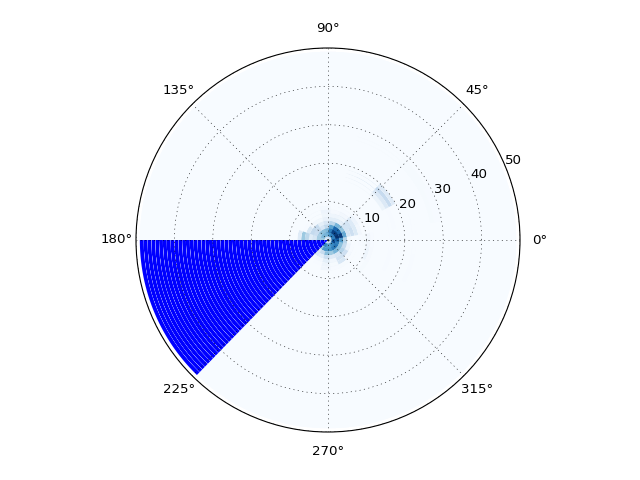

In [412]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='polar')

for r in range(len(rbin)-1):
    alpha = test[:,r]
    bars = ax.bar(tbin,[1]*len(tbin),bottom=r,edgecolor='none')
    for a,bar in zip(alpha,bars):
        bar.set_facecolor(m.to_rgba(a))

# polar back to cartesian

In [413]:
def p_to_c(row):
    y = row.r*np.sin(row.theta)
    x = row.r*np.cos(row.theta)
    
    return(pd.Series({'xp':x, 'yp':y}))

In [416]:
Ldfs[0]

[        Unnamed: 0  value      x      y      z          ac          r  \
 0          2442400   0.95  406.0  197.0   11.0  -26.722200  79.783609   
 1          2653845   0.93  400.0  197.0   12.0  -24.765782  78.871235   
 2          2653851   0.91  406.0  197.0   12.0  -26.863539  79.221153   
 3          2654441   0.93  407.0  198.0   12.0  -27.286191  80.113989   
 4          2864713   0.92  406.0  196.0   13.0  -26.937773  77.835907   
 5          2865297   0.91  401.0  197.0   13.0  -25.247043  78.386144   
 6          2865301   0.92  405.0  197.0   13.0  -26.651495  78.604852   
 7          2865307   0.98  411.0  197.0   13.0  -28.795627  79.009001   
 8          2865308   0.92  412.0  197.0   13.0  -29.157063  79.085561   
 9          2865885   0.93  400.0  198.0   13.0  -24.963739  79.185927   
 10         2865895   0.94  410.0  198.0   13.0  -28.506179  79.757979   
 11         3076163   0.93  405.0  196.0   14.0  -26.725497  77.222794   
 12         3076164   0.94  406.0  196

In [417]:
Lct = []
for df in Ldfs[0]:
    ndf = df.apply((lambda row: p_to_c(row)),axis=1)
    Lct.append(ndf)

In [423]:
xpmin,xpmax = find_range(Lct,'xp')
ypmin,ypmax = find_range(Lct,'yp')

print(xpmin,xpmax)
print(ypmin,ypmax)

xnum = int((abs(xpmin)+xpmax)/10)
ynum = int((abs(ypmin)+ypmax)/10)

xbin = np.linspace(xpmin,xpmax,num=xnum)
ybin = np.linspace(ypmin,ypmax,num=ynum)

-212.088086545 241.496328748
-129.358523409 115.517422402


In [425]:
Lss = []
for ndf,df in zip(Lct,Ldfs[0]):
    print('i',i)
    for k in range(len(acbin)-2):
        print('k',k)
        if i==0:
            hms = np.zeros((len(Ldfs[0]),len(xbin)-1,len(ybin)-1))
            Lss.append(hms)
                
        try:
            xsl = ndf[np.logical_and(df.ac > acbin[k], df.ac <= acbin[k+1])]
            hm = np.histogram2d(xsl.xp,xsl.yp,bins=[xbin,ybin])
            Lss[k][i] = hm[0]
        except KeyError: 
            pass

i 0
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 0
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 0
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 0
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 0
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13


C:\Users\zfishlab\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning:

invalid value encountered in greater_equal



k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 0
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 0
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 0
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45
k 46
k 47
i 0
k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19
k 20
k 21
k 22
k 23
k 24
k 25
k 26
k 27
k 28
k 29
k 30
k 31
k 32
k 33
k 34
k 35
k 36
k 37
k 38
k 39
k 40
k 41
k 42
k 43
k 44
k 45

In [431]:
sp = Ldfs[0][0]
sp.head()

,Unnamed: 0,value,x,y,z,ac,r,theta,xc,yc,zc
0,2442400,0.95,406.0,197.0,11.0,-26.722200,79.783609,-2.905674,400.471008,131.455606,56.152929
1,2653845,0.93,400.0,197.0,12.0,-24.765782,78.871235,-2.945002,395.976095,130.609734,54.388824
2,2653851,0.91,406.0,197.0,12.0,-26.863539,79.221153,-2.914998,400.789205,131.516562,56.280449
3,2654441,0.93,407.0,198.0,12.0,-27.286191,80.113989,-2.916648,401.735714,131.698722,56.661830
4,2864713,0.92,406.0,196.0,13.0,-26.937773,77.835907,-2.917681,400.955990,131.548569,56.347428


In [430]:
sc = Lct[0]
sc.head()

,xp,yp
0,-77.573598,-18.648356
1,-77.352037,-15.405651
2,-77.196026,-17.797886
3,-78.095639,-17.869594
4,-75.892839,-17.283099


In [434]:
cscatter = dict(
    x = sc.xp,
    y = sc.yp,
    type = 'scatter',
    mode = 'markers'
)
fig = go.Figure(data=[cscatter],layout=layout)
#iplot(fig)

In [427]:
trace = go.Heatmap(
    z = np.mean(Lss[40],axis=0),
    x = xbin,
    y = ybin
)

fig = go.Figure(data=[trace],layout=layout)
iplot(fig)

# Tiny histograms

Lhms = list of heatmap stacks

In [437]:
Lhms[0][0].shape

(17, 49, 14)

In [440]:
Lhms[0][0][:,10,5]

array([  398.,     0.,    52.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,  2814.,     0.,     0.,
           0.])

In [441]:
data = go.Histogram(x = Lhms[0][0][:,10,5])
iplot([data])

In [443]:
box = go.Box(
    y = Lhms[0][0][:,20,5],
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
)
iplot([box])

# Json boxplot data

In [448]:
import json

In [480]:
class Node():
    
    def __init__(self,name,array):
        self.name = name
        self.array = list(array)

In [490]:
class nodeJSONEncoder(json.JSONEncoder):
    
    def default(self,node):
        if type(node) == Node:
            return(str(node.name):node.array)
        raise TypeError("{} is not an instance fo Node".format(node))

In [450]:
print(acbin)
print(tbin)

[-200.82288627 -191.94110108 -183.0593159  -174.17753071 -165.29574553
 -156.41396035 -147.53217516 -138.65038998 -129.76860479 -120.88681961
 -112.00503443 -103.12324924  -94.24146406  -85.35967888  -76.47789369
  -67.59610851  -58.71432332  -49.83253814  -40.95075296  -32.06896777
  -23.18718259  -14.3053974    -5.42361222    3.45817296   12.33995815
   21.22174333   30.10352852   38.9853137    47.86709888   56.74888407
   65.63066925   74.51245444   83.39423962   92.2760248   101.15780999
  110.03959517  118.92138036  127.80316554  136.68495072  145.56673591
  154.44852109  163.33030628  172.21209146  181.09387664  189.97566183
  198.85744701  207.73923219  216.62101738  225.50280256  234.38458775]
[-3.14159103 -2.81089745 -2.48020386 -2.14951028 -1.8188167  -1.48812312
 -1.15742954 -0.82673596 -0.49604238 -0.16534879  0.16534479  0.49603837
  0.82673195  1.15742553  1.48811911  1.8188127   2.14950628  2.48019986
  2.81089344  3.14158702]


In [460]:
len(Lhms)

4

In [464]:
Lhms

[(array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          ..., 
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.]],
  
         [[  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          ..., 
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.]],
  
         [[  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          ..., 
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0

In [471]:
Lhms[0].shape

(17, 49, 14)

In [491]:
Lnodes = []
for i in range(len(acbin)-2):
    x = (acbin[i]+acbin[i+1])/2
    for j in range(len(tbin)-2):
        y = (tbin[j]+tbin[j+1])/2
        
        name = str(np.round(x))+'_'+str(np.round(y))
        node = Node(name,Lhms[3][:,i,j])
        Lnodes.append(node)

In [479]:
list(Lnodes[299].array)


[69.0,
 43.0,
 270.0,
 49.0,
 16.0,
 0.0,
 609.0,
 438.0,
 964.0,
 729.0,
 0.0,
 4158.0,
 0.0,
 0.0,
 1723.0,
 210.0,
 0.0]

In [492]:
f = open('atwt_theta_hm3.json','w')
f.write('[')
for node in Lnodes:
    f.write(json.dumps(json.loads(nodeJSONEncoder().encode(node)),indent=2,sort_keys=True))
    f.write(',\n')
f.write(']')
f.close()

In [495]:
f = open('atwt.json','w')
f.write('{')
for node in Lnodes:
    f.write('\"'+node.name+'\":'+str(node.array)+',')
f.write('}')
f.close()